
1.1  Import data into Python environment.
1.2  Provide the trend chart for the number of complaints at monthly and daily granularity levels.
1.3  Provide a table with the frequency of complaint types.

2.Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
   2.1  Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
   2.2  Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

3.  Which state has the maximum complaints
4.  Which state has the highest percentage of unresolved complaints
5.  Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.



In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
dataset=pd.read_csv('Project 3.csv',low_memory=False)
type(dataset)

pandas.core.frame.DataFrame

In [7]:
dataset.info

<bound method DataFrame.info of      Ticket #                                 Customer Complaint      Date  \
0      250635                      Comcast Cable Internet Speeds  22-04-15   
1      223441       Payment disappear - service got disconnected  04-08-15   
2      242732                                  Speed and Service  18-04-15   
3      277946  Comcast Imposed a New Usage Cap of 300GB that ...  05-07-15   
4      307175         Comcast not working and no service to boot  26-05-15   
...       ...                                                ...       ...   
2219   213550                               Service Availability  04-02-15   
2220   318775         Comcast Monthly Billing for Returned Modem  06-02-15   
2221   331188                            complaint about comcast  06-09-15   
2222   360489             Extremely unsatisfied Comcast customer  23-06-15   
2223   363614               Comcast, Ypsilanti MI Internet Speed  24-06-15   

     Date_month_year         Ti

In [8]:
dataset.describe()

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


In [50]:
dataset.shape

(2224, 11)

In [51]:
dataset.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [9]:
dataset.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [10]:
dataset.isna().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [11]:
dataset['Date_time_index']=dataset["Date_month_year"] + " " + dataset["Time"]
dataset.head()
# dataset_1['Date_month_year'].value_counts()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Date_time_index
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22-Apr-15 3:53:50 PM
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,04-Aug-15 10:22:56 AM
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18-Apr-15 9:55:47 AM
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,05-Jul-15 11:59:35 AM
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,26-May-15 1:25:26 PM


In [12]:
dataset['Date_month_year'] = pd.to_datetime(dataset['Date_month_year'])
dataset['Date_time_index']=pd.to_datetime(dataset['Date_time_index'])
dataset.dtypes

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
Date_time_index                datetime64[ns]
dtype: object

In [86]:
# freq_month_com = dataset.groupby(pd.Grouper(freq="M")).size()
dataset['Month']= dataset['Date'].str[3:5]
dataset['Day'] = dataset['Date'].str[0:2] 
dataset['Year'] = dataset['Date'].str[7:9]

In [87]:
# dataset.drop(['YY','DD'], axis=1, inplace=True)
dataset.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Date_time_index,MMM,Month,Day,Year
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,04-,04,22,5
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,08-,08,04,5
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,04-,04,18,5
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,07-,07,05,5
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,05-,05,26,5


Text(0.5, 1.0, 'Plot showing number of complaints of each month')

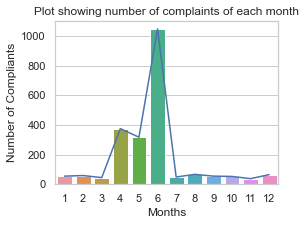

In [88]:

dataset.groupby(['Month']).size().plot()
plt.xlim(0,12)
plt.xticks( range(0,12,1) )
plt.ylabel("Counts")
plt.title("Number of complaints in monthwise")

sns.set(style = 'whitegrid', rc = {'figure.figsize':(4,3)})
month_chart = sns.barplot(x = pd.to_numeric(dataset.groupby('Month').count().index),y = dataset.groupby('Month').count()['Customer Complaint'].values)
month_chart.set_xlabel("Months")
month_chart.set_ylabel("Number of Compliants")
month_chart.set_title('Plot showing number of complaints of each month')

Text(0.5, 1.0, 'Plot showing number of complaints per date of each month')

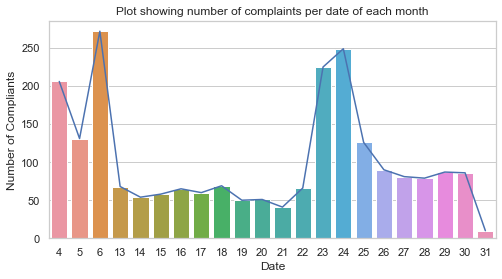

In [77]:
dataset.groupby(['Day']).size().plot()
# plt.xlim([1,31])
plt.xticks( range(0,31,1) )
plt.ylabel("Counts")
plt.title("Number of complaints in Daywise")

sns.set(style = 'whitegrid', rc = {'figure.figsize':(8,4)})
day_chart = sns.barplot(x = pd.to_numeric(dataset.groupby('Day').count().index),y = dataset.groupby('Day').count()['Customer Complaint'].values)
day_chart.set_xlabel("Date")
day_chart.set_ylabel("Number of Compliants")
day_chart.set_title('Plot showing number of complaints per date of each month')

In [92]:
freq_com_types=dataset.groupby(dataset['Customer Complaint']).size().reset_index()

In [93]:
freq_com_types=freq_com_types.rename(columns={0:'Number of Complaints'})

In [96]:
freq_com_types.sort_values(by='Number of Complaints',ascending=False)

,Customer Complaint,Number of Complaints
160,Comcast,83
331,Comcast Internet,18
266,Comcast Data Cap,17
1631,comcast,13
208,Comcast Billing,11
...,...,...
643,Comcast internet speeds extremely slow,1
642,Comcast internet speeds,1
641,Comcast internet service that I was NEVER able...,1
639,Comcast internet price high,1


In [92]:
dataset['Status'].unique()


array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [101]:
# updated_status=dataset.groupby(dataset['Status']).size()
# for status in dataset['Status']:

dataset['Updatd_status']=["Open" if Status=="Open" else "Closed" for Status in dataset["Status"]]

In [102]:
dataset.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Date_time_index,MMM,Month,Day,Year,Updatd_status
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,04-,04,22,5,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,08-,08,04,5,Closed
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,04-,04,18,5,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,07-,07,05,5,Open
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,05-,05,26,5,Closed


In [103]:
dataset['State'].unique()
# plt.bar(Class, Pass, w)

array(['Maryland', 'Georgia', 'Michigan', 'California', 'New Mexico',
       'Indiana', 'Virginia', 'Illinois', 'Pennsylvania', 'Massachusetts',
       'Oregon', 'Texas', 'New Hampshire', 'Minnesota', 'Tennessee',
       'Colorado', 'Florida', 'Alabama', 'Washington', 'New York',
       'New Jersey', 'Maine', 'Missouri', 'West Virginia', 'Montana',
       'Mississippi', 'Connecticut', 'Vermont', 'Kentucky',
       'South Carolina', 'Ohio', 'Utah', 'Delaware', 'Arkansas', 'Nevada',
       'Louisiana', 'Kansas', 'Arizona', 'North Carolina', 'Rhode Island',
       'District Of Columbia', 'District of Columbia', 'Iowa'],
      dtype=object)

In [106]:
stacked_chart_1=dataset.groupby(['State','Updatd_status']).size().unstack()
stacked_chart_1
# stacked_chart=stacked_chart.rename(columns={'Updated_status':'index'})
stack_chart_2=stacked_chart_1.fillna(0)

In [107]:
stack_chart_2.head()

Updatd_status,Closed,Open
State,,
Alabama,22.0,4.0
Arizona,18.0,2.0
Arkansas,6.0,0.0
California,173.0,47.0
Colorado,68.0,12.0


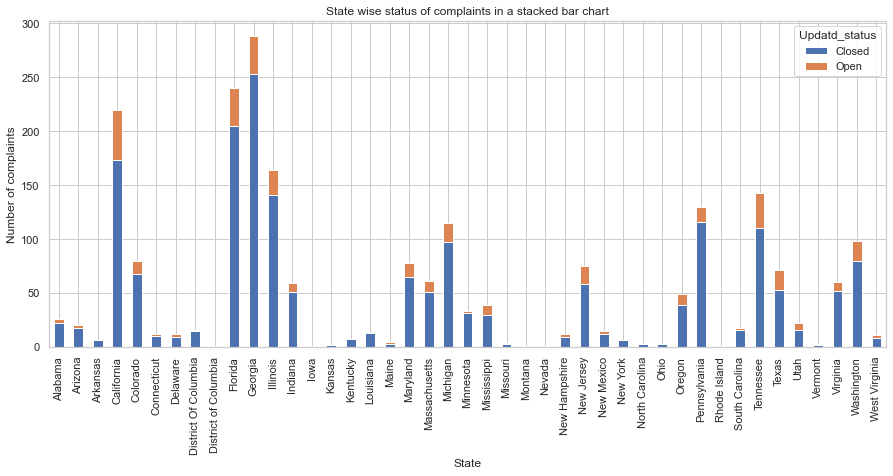

In [110]:
# x=stack_chart_2['Updatd_status']
# w=0.7
# plt.bar(x, Open, w)
# plt.bar(x, Closed, w, bottom=Closed)
# # plt.bar(x=Updated_status, y=State, w=0.7)
# # Stack_chart_1.plt(kind="barh", figsize=(30,50), stacked=True)

sns.set(style='whitegrid',rc={'figure.figsize':(15,6)})
stack_chart_2.plot(kind="bar", stacked=True)
plt.ylabel("Number of complaints")
plt.title("State wise status of complaints in a stacked bar chart")
plt.show()

In [113]:
Max_state_com=dataset.groupby(['State','Customer Complaint']).size().reset_index()

In [114]:
Max_state_com_1=Max_state_com.groupby(['State']).size().reset_index()

In [123]:
Max_state_com_2=Max_state_com_1.rename(columns={0:'Number of complaints'})
Max_state_com_2
Max_state_com_2.sort_values(by='Number of complaints', ascending=False)

,State,Number of complaints
10,Georgia,242
9,Florida,225
3,California,209
11,Illinois,154
33,Pennsylvania,120
36,Tennessee,117
20,Michigan,107
41,Washington,93
4,Colorado,77
18,Maryland,75


In [126]:
unres_complaints=dataset.groupby(['State','Updatd_status']).size().unstack()
unres_complaints=unres_complaints.fillna(0)

In [128]:
unres_complaints_1=unres_complaints.reset_index()
unres_complaints_1

Updatd_status,State,Closed,Open
0,Alabama,22.0,4.0
1,Arizona,18.0,2.0
2,Arkansas,6.0,0.0
3,California,173.0,47.0
4,Colorado,68.0,12.0
5,Connecticut,10.0,2.0
6,Delaware,9.0,3.0
7,District Of Columbia,15.0,1.0
8,District of Columbia,1.0,0.0
9,Florida,205.0,35.0


In [131]:
# unres_complaints['Updatd_status'].unique()
# for State in unres_complaints['State']:
unres_complaints_1['Percent_Unresolved']=np.around((unres_complaints_1['Open'])/(unres_complaints_1['Open'] + unres_complaints_1['Closed'])*100)

In [133]:
unres_complaints_1.sort_values(by='Percent_Unresolved', ascending=False)

Updatd_status,State,Closed,Open,Percent_Unresolved
17,Maine,3.0,2.0,40.0
39,Vermont,2.0,1.0,33.0
42,West Virginia,8.0,3.0,27.0
38,Utah,16.0,6.0,27.0
23,Missouri,3.0,1.0,25.0
6,Delaware,9.0,3.0,25.0
37,Texas,53.0,18.0,25.0
26,New Hampshire,9.0,3.0,25.0
27,New Jersey,58.0,17.0,23.0
22,Mississippi,30.0,9.0,23.0


In [273]:
resolve_complaints=dataset.groupby(['Updatd_status','Received Via']).size().unstack()

In [275]:
resolve_complaints.reset_index()

Received Via,Updatd_status,Customer Care Call,Internet
0,Closed,933,928
1,Open,186,177


In [276]:
resolve_complaints['Percent_of_resolved CC']=np.around((resolve_complaints['Customer Care Call'])/(resolve_complaints['Customer Care Call']+resolve_complaints['Internet'])*100)

In [277]:
resolve_complaints

Received Via,Customer Care Call,Internet,Percent_of_resolved CC
Updatd_status,,,
Closed,933,928,50.0
Open,186,177,51.0


In [278]:
resolve_complaints['Percent_of_resolved_Intrnt']=np.around((resolve_complaints['Internet'])/(resolve_complaints['Customer Care Call']+resolve_complaints['Internet'])*100)

In [279]:
resolve_complaints

Received Via,Customer Care Call,Internet,Percent_of_resolved CC,Percent_of_resolved_Intrnt
Updatd_status,,,,
Closed,933,928,50.0,50.0
Open,186,177,51.0,49.0
